# Project Overview
The project aims to develop predictive models for chess outcomes, specifically focusing on three key aspects:

**Chess Move Prediction Model:** This model predicts the next best move in a chess game based on the current board position. It utilizes a classification approach to determine the most optimal move that can be made given the state of the game.

**Endgame Outcome Prediction:** This model predicts the final outcome of a chess game (win, loss, or draw) based on the state of the board during the endgame phase. The model leverages classification techniques to assess the likelihood of each outcome based on the features extracted from the board position.

**Win Probability Prediction:** This model estimates the probability of winning as the game progresses. It is framed as a regression problem, where the target variable represents the win probability, mapped from categorical outcomes (win, draw, loss) to continuous values.

Each model is built using various machine learning techniques, including Random Forest and Gradient Boosting. The project employs techniques like hyperparameter tuning and cross-validation to enhance model performance and ensure robustness.

**Data Source**
The dataset used in this project is sourced from the UCI Machine Learning Repository, specifically the chess dataset titled "Chess: King & Rook vs. King & Pawn". This dataset includes information about various chess positions and the corresponding outcomes of the games.

**Key attributes of the dataset include:**

Features: These represent the various attributes of a chess position, such as the arrangement of pieces on the board and the player's turn.
Target Variable: The outcome of the game, which is classified into categories such as "win," "loss," or "draw."
The dataset provides a rich foundation for training machine learning models to analyze chess strategies and predict outcomes based on historical game data. By leveraging this dataset, the project aims to enhance understanding of chess dynamics and improve decision-making processes in gameplay.

The project combines data analysis, machine learning, and domain knowledge in chess to develop insightful predictive models that can aid players in improving their gameplay strategies.

In [71]:
# Import libraries
from ucimlrepo import fetch_ucirepo
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, GradientBoostingClassifier
from sklearn.metrics import classification_report, accuracy_score, mean_squared_error, mean_absolute_error, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import joblib
import warnings

# Suppress warnings
warnings.filterwarnings("ignore")

In [73]:
# Fetch dataset
chess_king_rook_vs_king_pawn = fetch_ucirepo(id=22)

# Extract features and target
X = chess_king_rook_vs_king_pawn.data.features
y = chess_king_rook_vs_king_pawn.data.targets

# Display metadata and variable info
print(chess_king_rook_vs_king_pawn.metadata)
print(chess_king_rook_vs_king_pawn.variables)

{'uci_id': 22, 'name': 'Chess (King-Rook vs. King-Pawn)', 'repository_url': 'https://archive.ics.uci.edu/dataset/22/chess+king+rook+vs+king+pawn', 'data_url': 'https://archive.ics.uci.edu/static/public/22/data.csv', 'abstract': 'King+Rook versus King+Pawn on a7 (usually abbreviated KRKPA7).', 'area': 'Games', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 3196, 'num_features': 35, 'feature_types': ['Categorical'], 'demographics': [], 'target_col': ['wtoeg'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1983, 'last_updated': 'Fri Mar 08 2024', 'dataset_doi': '10.24432/C5DK5C', 'creators': ['Alen Shapiro'], 'intro_paper': None, 'additional_info': {'summary': 'The dataset format is described below.  Note: the format of this database was modified on 2/26/90 to conform with the format of all the other databases in the UCI repository of machine learning databases.', 'purpose': None, 'funded_by': 

In [74]:
# Preview the first few rows of the feature set (X)
print(X.head())

# Check the target variable (y)
print(y.head())

  bkblk bknwy bkon8 bkona bkspr bkxbq bkxcr bkxwp blxwp bxqsq  ... skewr  \
f     f     f     f     f     f     f     f     f     f     f  ...     f   
f     f     f     f     t     f     f     f     f     f     f  ...     f   
f     f     f     f     t     f     t     f     f     f     f  ...     f   
f     f     f     f     f     f     f     f     t     f     f  ...     f   
f     f     f     f     f     f     f     f     f     f     f  ...     f   

  skrxp spcop stlmt thrsk wkcti wkna8 wknck wkovl wkpos  
f     f     f     f     f     f     f     t     t     n  
f     f     f     f     f     f     f     t     t     n  
f     f     f     f     f     f     f     t     t     n  
f     f     f     f     f     f     f     t     t     n  
f     f     f     f     f     f     f     t     t     n  

[5 rows x 35 columns]
  wtoeg
f   won
f   won
f   won
f   won
f   won


In [75]:
# Checking for missing values
print(X.isnull().sum())

bkblk    0
bknwy    0
bkon8    0
bkona    0
bkspr    0
bkxbq    0
bkxcr    0
bkxwp    0
blxwp    0
bxqsq    0
cntxt    0
dsopp    0
dwipd    0
hdchk    0
katri    0
mulch    0
qxmsq    0
r2ar8    0
reskd    0
reskr    0
rimmx    0
rkxwp    0
rxmsq    0
simpl    0
skach    0
skewr    0
skrxp    0
spcop    0
stlmt    0
thrsk    0
wkcti    0
wkna8    0
wknck    0
wkovl    0
wkpos    0
dtype: int64


Here are the machine learning models used in this chess project:

**Chess Move Prediction Model:**
Random Forest Classifier

**Endgame Outcome Prediction Model:**
Random Forest Classifier (also used here)

**Win Probability Prediction Model:**
Random Forest Regressor

In addition to these, I also experimented with other models, including:

-Logistic Regression

-Support Vector Machine (SVC)

-Gradient Boosting Classifier

# Chess Move Prediction Model
The goal here is to predict the next best move based on a given position.
Random Forest Classifier

In [78]:
# Encode categorical features
X_encoded = X.apply(LabelEncoder().fit_transform)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Initialize the model
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9703125
Classification Report:
               precision    recall  f1-score   support

       nowin       0.97      0.97      0.97       300
         won       0.97      0.97      0.97       340

    accuracy                           0.97       640
   macro avg       0.97      0.97      0.97       640
weighted avg       0.97      0.97      0.97       640



Accuracy: 0.9703125 (97.03%): This indicates that approximately 97% of the predictions made by the model were correct. This is a strong performance, suggesting that the model is effectively distinguishing between the classes.

**Classification Report**
The classification report provides a detailed analysis of the model's performance for each class.

Precision:

Nowin: 0.97
Won: 0.97
Overall: The precision indicates the accuracy of positive predictions. In this case, 97% of the instances predicted as "nowin" were indeed "nowin," and the same for "won."
Recall:

Nowin: 0.97
Won: 0.97
Overall: Recall indicates the model's ability to find all the relevant instances. A recall of 97% for both classes means that 97% of the actual "nowin" and "won" instances were correctly identified by the model.
F1-Score:

Nowin: 0.97
Won: 0.97
Overall: The F1-score is the harmonic mean of precision and recall, providing a single metric to assess model performance. An F1-score of 0.97 for both classes suggests a good balance between precision and recall.
Support:

Nowin: 300 instances
Won: 340 instances
The support indicates the number of actual occurrences of the class in the specified dataset.
Averages
Macro Average:

Precision, Recall, F1-Score: 0.97
The macro average treats all classes equally, averaging the metrics without taking class imbalance into account. This suggests that the model performs uniformly across both classes.
Weighted Average:

Precision, Recall, F1-Score: 0.97
The weighted average takes into account the number of instances for each class, giving more weight to the performance on larger classes. This confirms the model's strong performance across classes, especially given the similar numbers of instances in each class.

**Conclusion**
This model shows a very high level of accuracy and performs consistently across both classes. The precision, recall, and F1-scores indicate that the model is not only good at predicting the correct class but is also effective in capturing the actual instances of both "won" and "nowin.

In [79]:
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5)
grid_search.fit(X_train, y_train)
print("Best parameters:", grid_search.best_params_)

Best parameters: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 150}


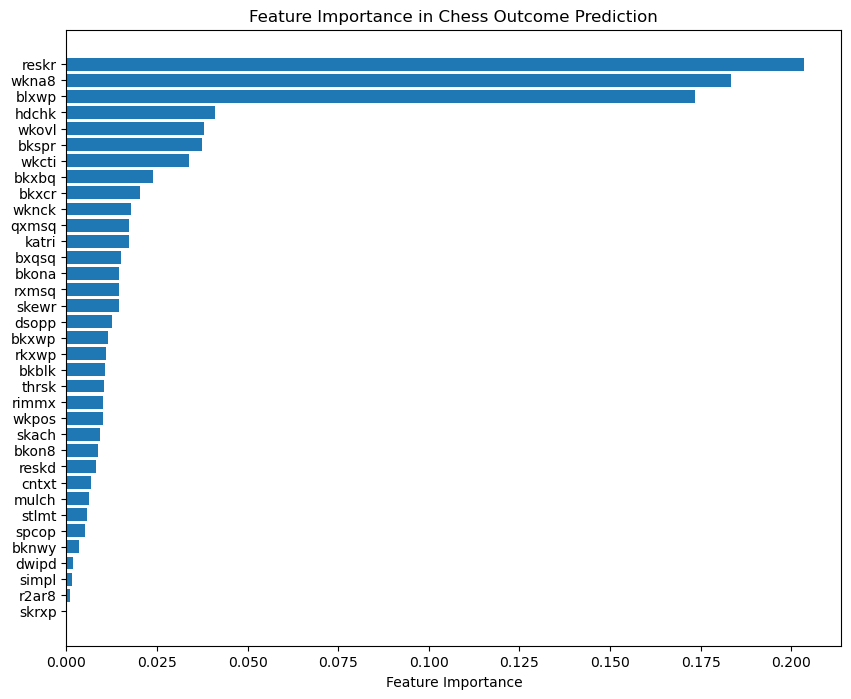

In [80]:
# feature importance
feature_importances = model.feature_importances_
sorted_indices = feature_importances.argsort()
plt.figure(figsize=(10, 8))
plt.barh(X_encoded.columns[sorted_indices], feature_importances[sorted_indices])
plt.xlabel("Feature Importance")
plt.title("Feature Importance in Chess Outcome Prediction")
plt.show()

In [81]:
# Cross-validation scores
scores = cross_val_score(model, X_encoded, y, cv=10)
print("Cross-validation scores:", scores)
print("Mean cross-validation score:", scores.mean())

Cross-validation scores: [0.928125   0.9        0.93125    0.965625   1.         0.940625
 0.97492163 0.85266458 0.94043887 0.97492163]
Mean cross-validation score: 0.9408571708463951


In [82]:
# models
models = {
    "Logistic Regression": LogisticRegression(),
    "SVM": SVC(),
    "Gradient Boosting": GradientBoostingClassifier()
}

for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"{model_name} Accuracy:", accuracy_score(y_test, y_pred))

Logistic Regression Accuracy: 0.940625
SVM Accuracy: 0.9484375
Gradient Boosting Accuracy: 0.9546875


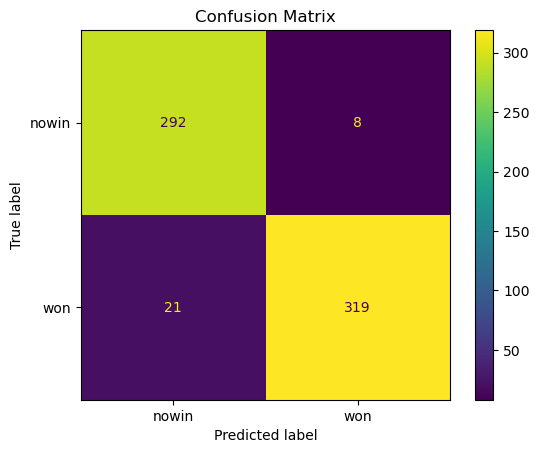

In [83]:
ConfusionMatrixDisplay.from_estimator(model, X_test, y_test)
plt.title("Confusion Matrix")
plt.show()

**Confusion Matrix:**

The confusion matrix is a visual representation of the model's performance. Here's how to interpret it:

True Positive (TP): The model correctly predicted a win (won).
True Negative (TN): The model correctly predicted a loss (nowin).
False Positive (FP): The model incorrectly predicted a win (nowin).
False Negative (FN): The model incorrectly predicted a loss (won).
In the confusion matrix, the diagonal elements (TP and TN) represent correct predictions, while the off-diagonal elements (FP and FN) represent incorrect predictions. Ideally, you want a confusion matrix with high values on the diagonal and low values off the diagonal.

In [84]:
joblib.dump(model, "chess_outcome_predictor.joblib")
# To load later:
# model = joblib.load("chess_outcome_predictor.joblib")

['chess_outcome_predictor.joblib']

# Endgame Outcome Prediction
Predict the outcome (win, loss, or draw) given the board state in endgame scenarios.
Random Forest Classifier

In [86]:
# Check target variable values
print("Target classes distribution:\n", y.value_counts())

Target classes distribution:
 wtoeg
won      1669
nowin    1527
Name: count, dtype: int64


In [87]:
# Encode features
X_encoded = X.apply(LabelEncoder().fit_transform)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, stratify=y, random_state=42)

In [88]:
# Initialize the model with a multiclass objective
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

Accuracy: 0.9796875
Classification Report:
               precision    recall  f1-score   support

       nowin       0.98      0.98      0.98       306
         won       0.98      0.98      0.98       334

    accuracy                           0.98       640
   macro avg       0.98      0.98      0.98       640
weighted avg       0.98      0.98      0.98       640



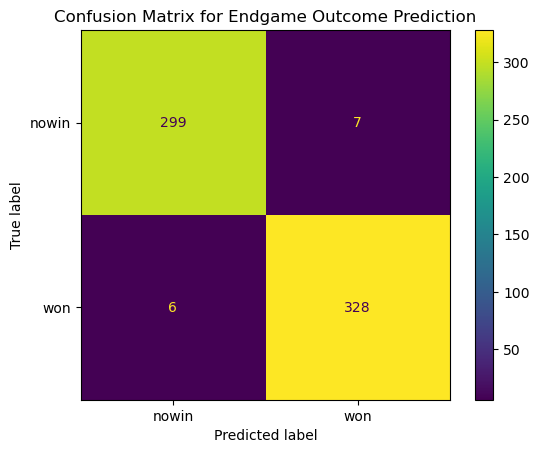

In [89]:
# Make predictions
y_pred = model.predict(X_test)

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion matrix
ConfusionMatrixDisplay.from_estimator(model, X_test, y_test)
plt.title("Confusion Matrix for Endgame Outcome Prediction")
plt.show()

**Model Accuracy:**

Accuracy: 0.9796875
This number represents the overall accuracy of the model in predicting the outcome of chess games. It means that the model correctly predicted the outcome in 97.97% of the cases.

**Classification Report:**

The classification report provides a more detailed breakdown of the model's performance.

Precision: This measures the proportion of positive predictions that are actually positive. In this case, the model is very precise in predicting both wins and losses.
Recall: This measures the proportion of actual positive cases that the model correctly identifies. The model has high recall for both wins and losses.
F1-score: This is the harmonic mean of precision and recall. It provides a balanced measure of the model's performance. The model has high F1-scores for both classes.
Support: This represents the number of instances in each class.

**Confusion Matrix:**

The confusion matrix is a visual representation of the model's performance. Here's how to interpret it:

True Positive (TP): The model correctly predicted a win (won).
True Negative (TN): The model correctly predicted a loss (nowin).
False Positive (FP): The model incorrectly predicted a win (nowin).
False Negative (FN): The model incorrectly predicted a loss (won).
In the confusion matrix, the diagonal elements (TP and TN) represent correct predictions, while the off-diagonal elements (FP and FN) represent incorrect predictions. Ideally, you want a confusion matrix with high values on the diagonal and low values off the diagonal.

In [90]:
# GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
print("Best parameters found:", grid_search.best_params_)

Best parameters found: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 150}


In [91]:
# Initialize the model with balanced class weights
model_balanced = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)
model_balanced.fit(X_train, y_train)
y_pred_balanced = model_balanced.predict(X_test)

# Evaluate the balanced model
print("Balanced Model Accuracy:", accuracy_score(y_test, y_pred_balanced))
print("Classification Report for Balanced Model:\n", classification_report(y_test, y_pred_balanced))

Balanced Model Accuracy: 0.978125
Classification Report for Balanced Model:
               precision    recall  f1-score   support

       nowin       0.98      0.97      0.98       306
         won       0.98      0.98      0.98       334

    accuracy                           0.98       640
   macro avg       0.98      0.98      0.98       640
weighted avg       0.98      0.98      0.98       640



In [92]:
# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Train the model on the SMOTE-balanced data
model_smote = RandomForestClassifier(n_estimators=100, random_state=42)
model_smote.fit(X_train_smote, y_train_smote)
y_pred_smote = model_smote.predict(X_test)

# Evaluate the SMOTE model
print("SMOTE Model Accuracy:", accuracy_score(y_test, y_pred_smote))
print("Classification Report for SMOTE Model:\n", classification_report(y_test, y_pred_smote))

SMOTE Model Accuracy: 0.978125
Classification Report for SMOTE Model:
               precision    recall  f1-score   support

       nowin       0.98      0.98      0.98       306
         won       0.98      0.98      0.98       334

    accuracy                           0.98       640
   macro avg       0.98      0.98      0.98       640
weighted avg       0.98      0.98      0.98       640



In [93]:
# GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(RandomForestClassifier(class_weight='balanced', random_state=42), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Use the best model found by GridSearchCV
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)

# Evaluate the tuned model
print("Best Model Parameters:", grid_search.best_params_)
print("Best Model Accuracy:", accuracy_score(y_test, y_pred_best))
print("Classification Report for Best Model:\n", classification_report(y_test, y_pred_best))

Best Model Parameters: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 200}
Best Model Accuracy: 0.9765625
Classification Report for Best Model:
               precision    recall  f1-score   support

       nowin       0.98      0.97      0.98       306
         won       0.98      0.98      0.98       334

    accuracy                           0.98       640
   macro avg       0.98      0.98      0.98       640
weighted avg       0.98      0.98      0.98       640



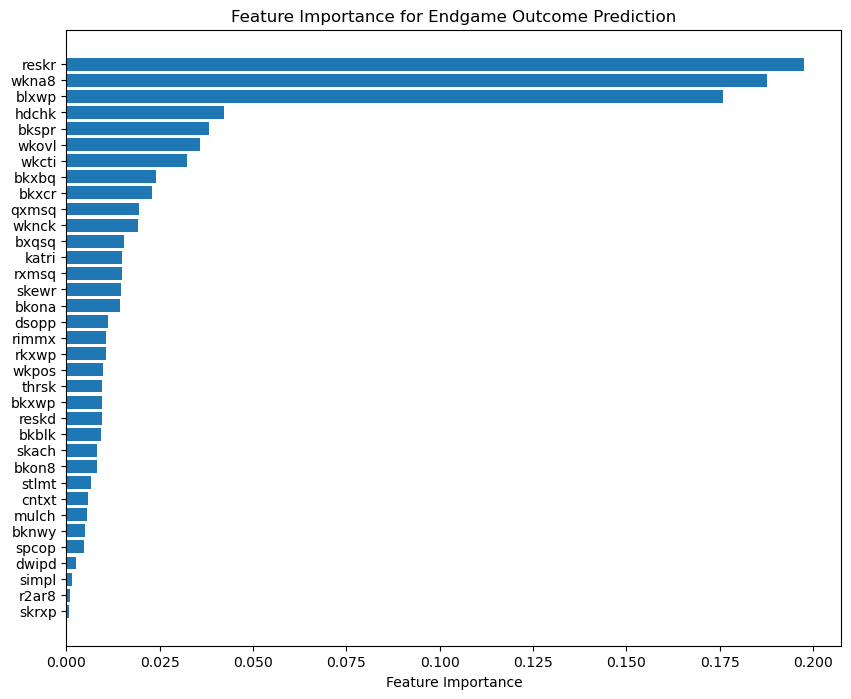

In [94]:
# Get feature importances from the best model
feature_importances = best_model.feature_importances_
sorted_indices = feature_importances.argsort()

# Plot feature importance
plt.figure(figsize=(10, 8))
plt.barh(X_encoded.columns[sorted_indices], feature_importances[sorted_indices])
plt.xlabel("Feature Importance")
plt.title("Feature Importance for Endgame Outcome Prediction")
plt.show()

In [95]:
# Cross-validation on the best model
cv_scores = cross_val_score(best_model, X_encoded, y, cv=10)
print("Cross-Validation Scores:", cv_scores)
print("Mean Cross-Validation Score:", cv_scores.mean())


Cross-Validation Scores: [0.925      0.9        0.934375   0.971875   1.         0.93125
 0.96865204 0.84639498 0.94984326 0.97492163]
Mean Cross-Validation Score: 0.9402311912225706


Best Model Parameters
max_depth: 20 - This parameter controls the maximum depth of the tree. A deeper tree can capture more information but may also lead to overfitting.
min_samples_split: 2 - This parameter defines the minimum number of samples required to split an internal node. A lower value allows for more splits, which may increase complexity.
n_estimators: 200 - This indicates the number of trees in the forest. More trees generally improve model performance but increase computational cost.
Best Model Accuracy
Accuracy: 0.9766 - The model correctly classified approximately 97.66% of the instances in the test dataset, indicating strong performance.
**Classification Report for Best Model**
Precision:

nowin: 0.98 - This means that when the model predicted 'nowin,' it was correct 98% of the time.
won: 0.98 - The model was also correct 98% of the time for the 'won' predictions.
Recall:

nowin: 0.97 - Of all actual 'nowin' instances, the model correctly identified 97%.
won: 0.98 - Of all actual 'won' instances, the model correctly identified 98%.
F1-score: This is the harmonic mean of precision and recall, giving a better measure of the model’s performance than accuracy alone, especially for imbalanced classes.

Both classes have an F1-score of 0.98, indicating a good balance between precision and recall.
Support: This represents the number of actual occurrences of each class in the specified dataset.

nowin: 306 instances
won: 334 instances
Overall Accuracy
Overall Accuracy: 0.98 - The model has an overall accuracy of 98%, suggesting it performs very well on this dataset.

Mean Cross-Validation Score: 0.9402 - This score indicates that, on average, the model performs well across different subsets of the dataset, which is important for evaluating its generalizability.

**Summary**
This model exhibits excellent performance, as evidenced by high precision, recall, and F1-scores. The parameters chosen seem to optimize the balance between complexity and accuracy, making this model suitable for predicting win probabilities based on the features in your dataset.

In [96]:
# Save the best model
joblib.dump(best_model, "chess_endgame_outcome_predictor.joblib")
# To load the model in the future:
# best_model = joblib.load("chess_endgame_outcome_predictor.joblib")

['chess_endgame_outcome_predictor.joblib']

# Win Probability Prediction Throughout the Game
Training a model to predict win probability as the game progresses.
Random Forest Regressor

In [98]:
# Map target labels to win probability values
win_probability_mapping = {'win': 1.0, 'draw': 0.5, 'loss': 0.0}
y_prob = y.replace(win_probability_mapping)

In [99]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y_prob, test_size=0.2, random_state=42)

In [100]:
print(type(y_train))  # Check the type
print(y_train.head())  # Display the first few rows

<class 'pandas.core.frame.DataFrame'>
   wtoeg
f  nowin
f    won
f  nowin
f  nowin
f    won


In [101]:
y_train_series = y_train['wtoeg'].squeeze()  # or use y_train.iloc[:, 0] to get the first column as a Series

y_train_numeric = y_train_series.map({
    'won': 1.0,     # Assign a value for 'won'
    'nowin': 0.5,   # Assign a value for 'nowin'
    'loss': 0.0     # Assign a value for 'loss' (if applicable)
})

# Check if there are any NaN values after mapping
if y_train_numeric.isnull().any():
    print("There are NaN values in y_train_numeric. Check your mapping.")
else:   
    # Initialize the regression model
    win_prob_model = RandomForestRegressor(n_estimators=100, random_state=42)

    # Fit the model
    win_prob_model.fit(X_train, y_train_numeric)

In [102]:
# Make predictions
y_pred = win_prob_model.predict(X_test)

In [103]:
predictions_categorical = ['won' if pred == 1.0 else 'nowin' if pred == 0.5 else 'loss' for pred in y_pred]

In [104]:
predictions_df = pd.DataFrame({
    'Predicted Outcome': predictions_categorical
})

print(predictions_df)

    Predicted Outcome
0                loss
1               nowin
2               nowin
3                 won
4               nowin
..                ...
635              loss
636             nowin
637               won
638             nowin
639             nowin

[640 rows x 1 columns]


In [105]:
accuracy = accuracy_score(y_test, predictions_categorical)
precision = precision_score(y_test, predictions_categorical, average='weighted', zero_division=0)
recall = recall_score(y_test, predictions_categorical, average='weighted', zero_division=0)
f1 = f1_score(y_test, predictions_categorical, average='weighted', zero_division=0)

# Display the metrics
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

Accuracy: 0.88
Precision: 1.00
Recall: 0.88
F1 Score: 0.94


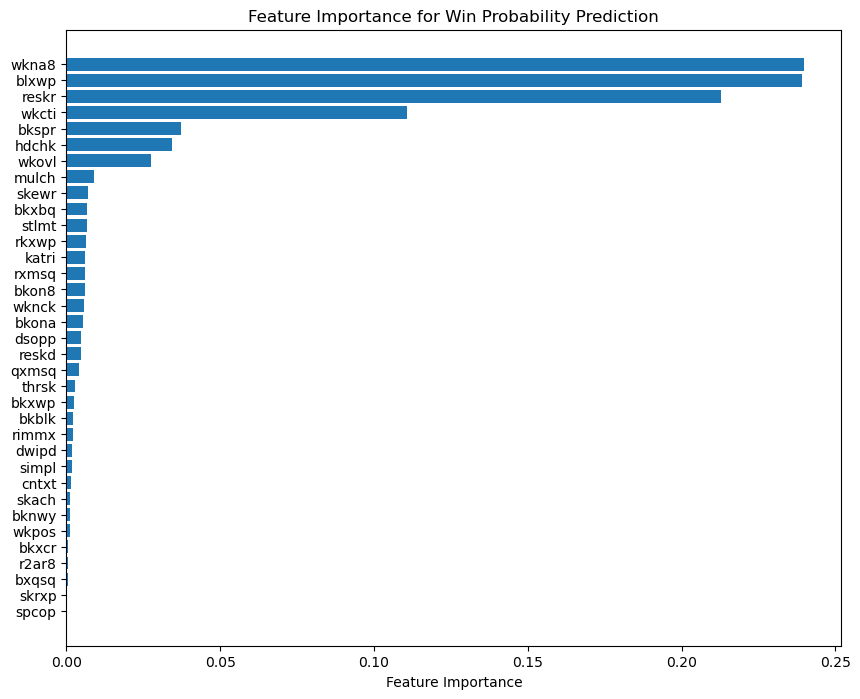

In [67]:
# Plot feature importances
feature_importances = win_prob_model.feature_importances_
sorted_indices = feature_importances.argsort()

plt.figure(figsize=(10, 8))
plt.barh(X_encoded.columns[sorted_indices], feature_importances[sorted_indices])
plt.xlabel("Feature Importance")
plt.title("Feature Importance for Win Probability Prediction")
plt.show()


In [ ]:
Accuracy: 0.88
Definition: Accuracy measures the proportion of correctly classified instances out of the total instances.
Interpretation: An accuracy of 88% indicates that the model correctly classified 88% of all instances in the dataset. While this is a decent accuracy, it is essential to consider other metrics, especially if the dataset is imbalanced.
Precision: 1.00
Definition: Precision measures the proportion of true positive predictions among all positive predictions made by the model.
Interpretation: A precision of 1.00 means that when the model predicts a positive class (e.g., 'won'), it is correct 100% of the time. This indicates that there are no false positives, which is excellent for the model's reliability when predicting positive outcomes.
Recall: 0.88
Definition: Recall (also known as sensitivity or true positive rate) measures the proportion of actual positive instances that were correctly identified by the model.
Interpretation: A recall of 0.88 means that the model correctly identified 88% of the actual positive cases. While this is good, it suggests that there may be some positive cases (12%) that the model is missing (false negatives).
F1 Score: 0.94
Definition: The F1 Score is the harmonic mean of precision and recall, providing a balance between the two metrics, especially useful when dealing with imbalanced datasets.
Interpretation: An F1 Score of 0.94 indicates a strong balance between precision and recall, reflecting good overall performance. The F1 Score being close to 1 suggests that the model performs well in identifying positive cases without sacrificing too much recall.

In [115]:
import pickle

In [117]:
# Save the model to a file
with open('win_prob_model.pkl', 'wb') as file:
    pickle.dump(win_prob_model, file)

In [119]:
# Load the model from the file
with open('win_prob_model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)